# Modeling - Ensemble Classification Algorithms

## Table of Contents:
[1. Import Train and Test Set](#1.-Import-Train-and-Test-Set)
<br>[2. Classifiers](#2.-Classifiers)
<br>&emsp;&emsp;&emsp;[2.1. Randome Forest](#2.1.-Randome-Forest)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[2.1.1. TF-IDF and Random Forest](#2.1.1.-TF-IDF-and-Random-Forest)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[2.1.2. TF-IDF, Random Oversampler and Random Forest](#2.1.2.-TF-IDF,-Random-Oversampler-and-Random-Forest)
<br>&emsp;&emsp;&emsp;[2.2. XGBoost Classifier](#2.2.-XGBoost-Classifier)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[2.2.1. TF-IDF and XGBoost](#2.2.1.-TF-IDF-and-XGBoost)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[2.2.2. TFIDF and XGBoost (Hyperparameter tuning)](#2.2.2.-TFIDF-and-XGBoost-(Hyperparameter-tuning))
<br>&emsp;&emsp;&emsp;[2.3. LGBM Classifier](#2.3.-XGBoost-Classifier)
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[2.2.3. TF-IDF and LightGBM Classifier](#2.2.3.-TF-IDF-and-LightGBM-Classifier)

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.utils.fixes import loguniform
from itertools import cycle
from timeit import default_timer as timer

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from Bayes_Opt_Classification import bayes_kfold_pipeline

from pandas import MultiIndex
from pandas import Int64Index

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/var/folders/6w/hzmbq90115906rg7xskdh8hm0000gn/T/ipykernel_28311/872990953.py:53: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index


## 1. Import Train and Test Set

In [2]:
df = pd.read_csv('Library/cleaned_text_train_df.csv')
df.head()

,clean_text,toxic_type
0,explanation edit make username hardcore metall...,0
1,aww match background colour seemingly stuck th...,0
2,hey man really not try edit war guy constantly...,0
3,make real suggestion improvement wonder sectio...,0
4,sir hero chance remember page,0


In [3]:
df.isna().sum()

clean_text    54
toxic_type     0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df_test = pd.read_csv('Library/cleaned_text_test_df.csv')
df_test.head()

,clean_text,toxic_type
0,thank understand think highly would not revert...,0
1,dear god site horrible,0
2,somebody invariably try add religion really me...,0
3,say right type type institution need case thre...,0
4,add new product list make sure relevant add ne...,0


In [6]:
df_test.isna().sum()

clean_text    437
toxic_type      0
dtype: int64

In [7]:
df_test = df_test.dropna()

In [8]:
df_test.head()

,clean_text,toxic_type
0,thank understand think highly would not revert...,0
1,dear god site horrible,0
2,somebody invariably try add religion really me...,0
3,say right type type institution need case thre...,0
4,add new product list make sure relevant add ne...,0


In [9]:
X_train = df['clean_text']
y_train = df['toxic_type']

X_test = df_test['clean_text']
y_test = df_test['toxic_type']

summary_dic ={}

## 2. Classifiers

### 2.1. Randome Forest

### 2.1.1. TF-IDF and Random Forest

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
3327 seconds elapsed.
total iterations will be taken to explore all subspaces:  60
------------------------------------------------------------------

 Parameters of the best model:
	clf__max_depth: 20
	clf__n_estimators: 1877
	tfidf__max_features: 1004
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    143292
           1       1.00      0.32      0.49     16225

    accuracy                           0.93    159517
   macro avg       0.96      0.66      0.73    159517
weighted avg       0.94      0.93      0.91    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     57298
           1       0.82      0.29      0.43      6243

    accuracy                           0.92     63541
   macro avg       0.88      0.64      0.70     63541
weighted avg       0.92      0.92      0.91     63541

------------------------------------------------------------------


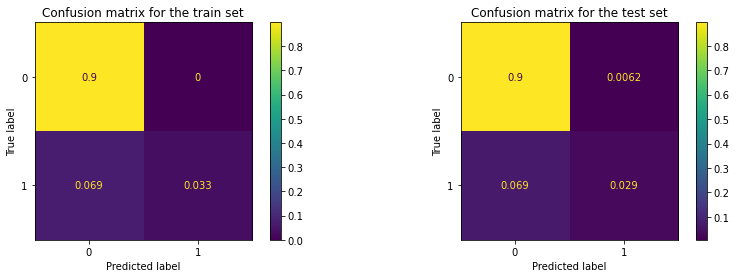

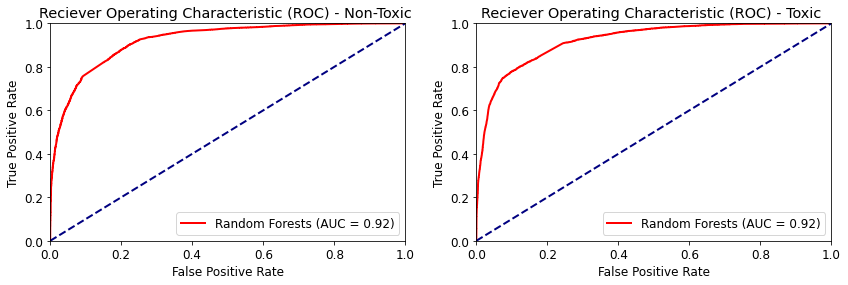

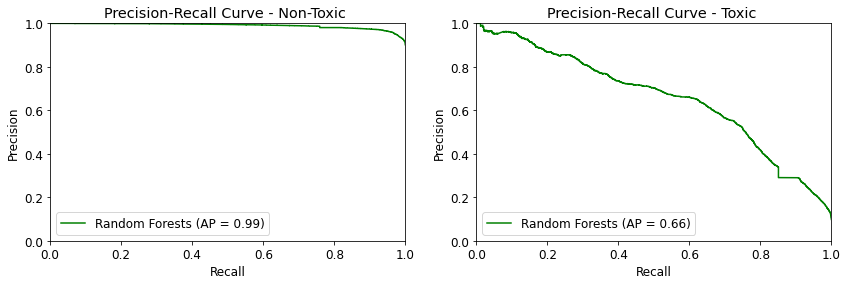

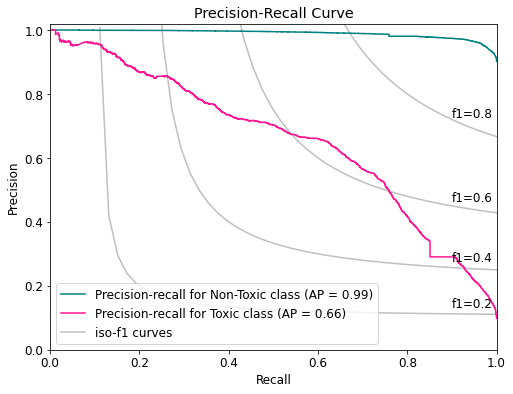

In [10]:
parameters = {
    'tfidf__max_features': (1000, 3000),
#     'under__sampling_strategy': (0.3, 1),
#     'under__n_neighbors': (3,10),
    'clf__n_estimators': (1000,2000),
    'clf__max_depth': (10, 20),
#     'clf__max_features': ('sqrt','log2'),
#     'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', RandomForestClassifier(warm_start=True))
resample = None

classifier_name = 'Random Forests'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['RF1'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=2, bayes_n_iter=20, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [11]:
summary_dic['RF1'].append('RF1')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['RF1']))
f.close()

### 2.1.2. TF-IDF, Random Oversampler and Random Forest

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
2772 seconds elapsed.
total iterations will be taken to explore all subspaces:  80
------------------------------------------------------------------

 Parameters of the best model:
	clf__max_depth: 20
	clf__n_estimators: 1200
	over__sampling_strategy: 0.6
	tfidf__max_features: 1000
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143292
           1       0.95      0.60      0.74     16225

    accuracy                           0.96    159517
   macro avg       0.95      0.80      0.86    159517
weighted avg       0.96      0.96      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     57298
           1       0.62      0.64      0.63      6243

    accuracy                           0.93     63541
   macro avg       0.79      0.80      0.79     63541
weighted avg       0.93      0.93      0.93     63541

------------------------------------------------------------------


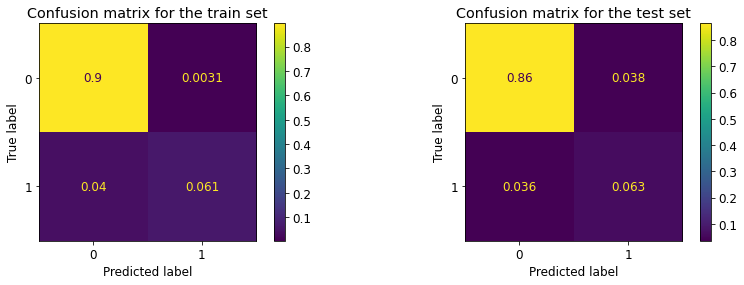

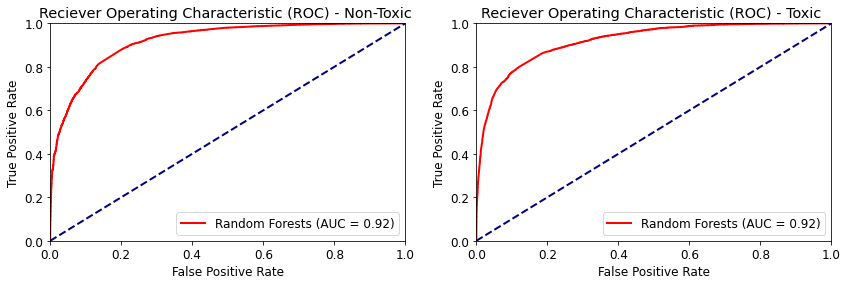

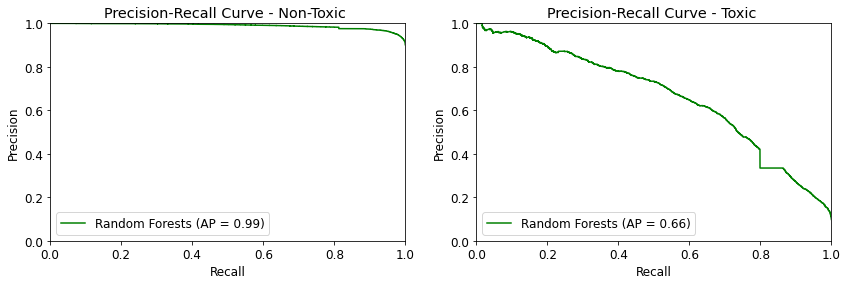

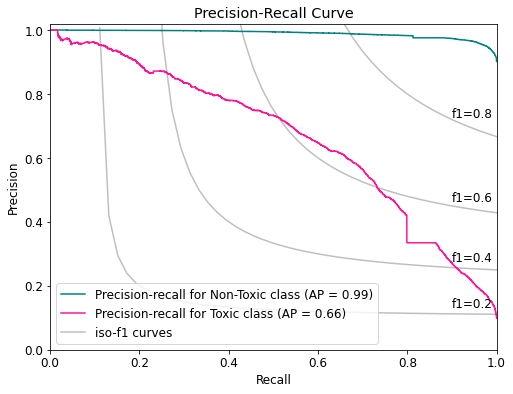

In [12]:
parameters = {
    'tfidf__max_features': (1000, 5000),
    'over__sampling_strategy': (0.3, 0.6),
#     'under__n_neighbors': (3,10),
    'clf__n_estimators': (600,1200),
    'clf__max_depth': (10, 20),
#     'clf__max_features': ('sqrt','log2'),
#     'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', RandomForestClassifier(warm_start=True))
resample = ('over', RandomOverSampler())

classifier_name = 'Random Forests'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['RF2'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=2, bayes_n_iter=20, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1, resample=resample))

In [91]:
summary_dic['RF2'].append('RF2')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['RF2']))
f.close()

## 2.2. XGBoost Classifier

### 2.2.1. TF-IDF and XGBoost

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use p

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[11:38:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:47:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
540 seconds elapsed.
total iterations will be taken to explore all subspaces:  4
------------------------------------------------------------------

 Parameters of the best model:
	tfidf__max_features: 3690
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143292
           1       0.96      0.67      0.79     16225

    accuracy                           0.96    159517
   macro avg       0.96      0.83      0.88    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     57298
           1       0.62      0.73      0.67      6243

    accuracy                           0.93     63541
   macro avg       0.79      0.84      0.81     63541
weighted avg       0.94      0.93      0.93     63541

------------------------------------------------------------------


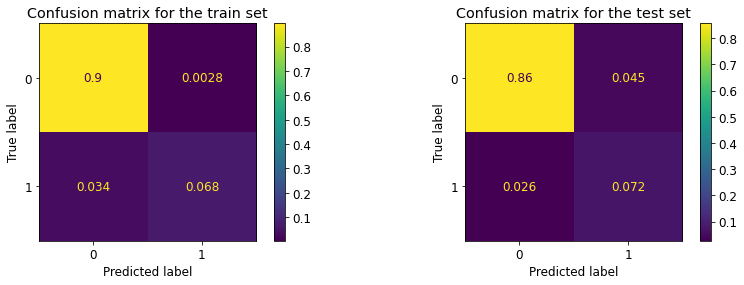

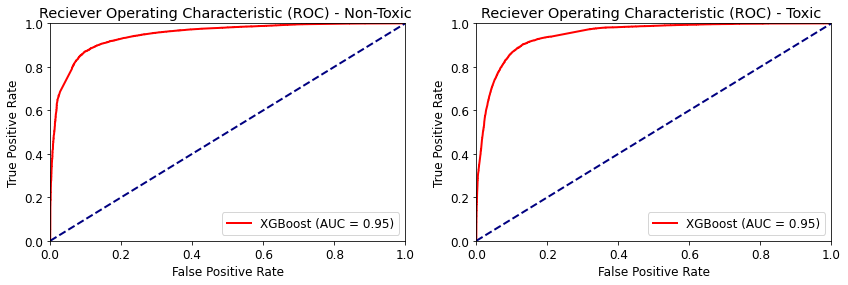

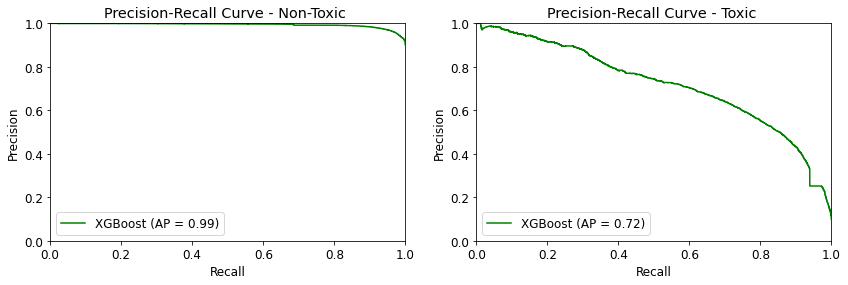

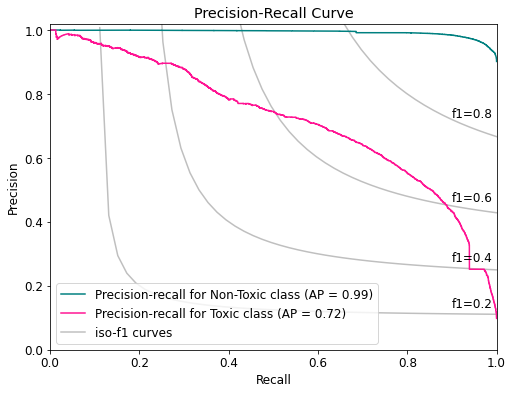

[11:40:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:43:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [37]:
parameters = {
    'tfidf__max_features': (1000, 10000),
#     'under__sampling_strategy': (0.3, 0.7),
#     'under__n_neighbors': (3,10),
#     'clf__n_estimators': (100, 3000),
#     'clf__max_depth': (10,20),
#     'clf__max_features': ('sqrt'),
#     'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', XGBClassifier(objective='binary:logistic', seed=12, use_label_encoder=False))
resample = None

classifier_name = 'XGBoost'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['XG1'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=4,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [92]:
summary_dic['XG1'].append('XG1')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['XG1']))
f.close()

### 2.2.2. TFIDF and XGBoost (Hyperparameter tuning)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[19:33:05] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:33:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:05] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:33:05] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[19:34:51] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:34:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:44:26] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:44:26] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[19:47:40] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:47:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:48] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:48] WARNING: ../src

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[20:54:33] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:54:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:12:23] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:12:23] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[22:37:34] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:39] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an iss

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[23:52:36] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:52:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:16] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:57:16] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[03:15:02] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:15:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:53] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:22:54] WARNING: ../src

[19:47:40] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:47:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:48] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:49] WARNING: ../src

[04:08:29] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:08:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
32279 seconds elapsed.
total iterations will be taken to explore all subspaces:  440
------------------------------------------------------------------

 Parameters of the best model:
	clf__colsample_bytree: 0.6930066414509981
	clf__eta: 0.3384418211915725
	clf__gamma: 1.0558952854860855
	clf__learning_rate: 0.02889846161519223
	clf__max_delta_step: 10
	clf__max_depth: 5
	clf__n_estim

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    143292
           1       0.89      0.86      0.87     16225

    accuracy                           0.97    159517
   macro avg       0.94      0.92      0.93    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     57298
           1       0.50      0.87      0.64      6243

    accuracy                           0.90     63541
   macro avg       0.74      0.89      0.79     63541
weighted avg       0.94      0.90      0.91     63541

------------------------------------------------------------------


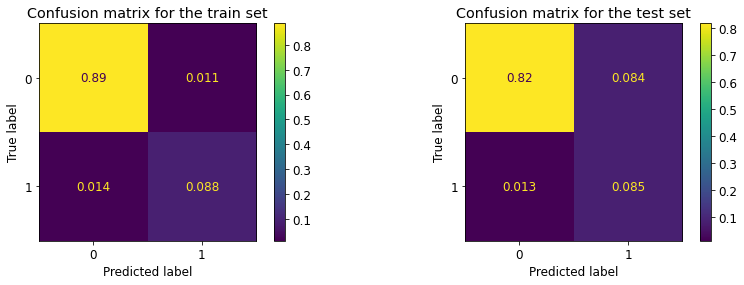

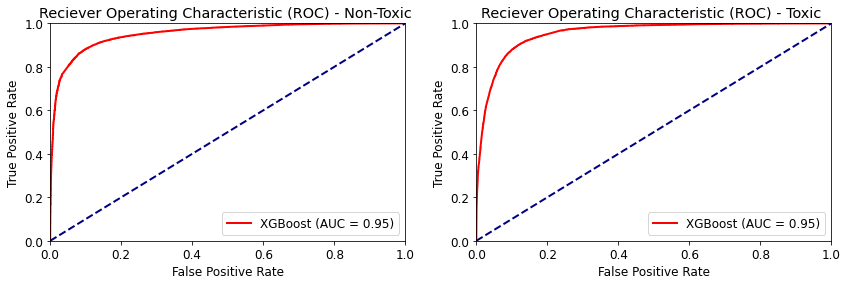

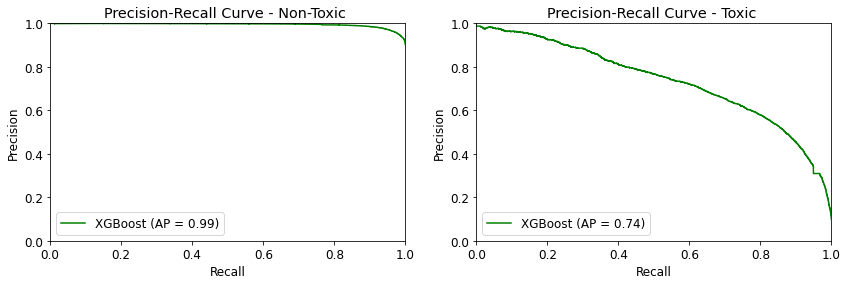

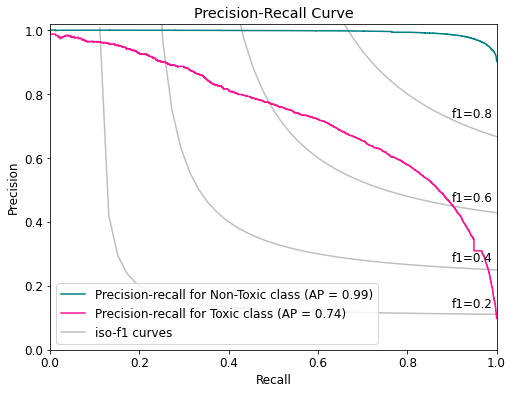

In [50]:
parameters = {
    'clf__n_estimators': (1000, 5000),
    'clf__max_depth': (3,5),
    ''
    'clf__learning_rate': (0.01,0.5),
    'clf__sub_sample': (0.5, 1),
    'clf__colsample_bylevel': (0.5, 1),
    'clf__subsample': (0.6, 1),
    'clf__gamma': (0.0,100.0),
    'clf__lambda': (0, 100),
    'clf__scale_pos_weight': (0.1, 15),
    'clf__max_delta_step': (1, 10)
}

text_vec = ('tfidf', TfidfVectorizer(max_features=4000))
classifier = ('clf', XGBClassifier(objective='binary:logistic', seed=12, use_label_encoder=False, 
                                   verbosity=3, booster='gbtree', n_jobs=-1))
resample = None

classifier_name = 'XGBoost'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['XG2'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=40, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [93]:
summary_dic['XG2'].append('XG2')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['XG2']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[06:26:56] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:26:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:26:56] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:26:56] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[06:28:44] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:28:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:39:43] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:39:44] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[06:43:14] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:43:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:49:50] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:49:50] WARNING: ../src

[06:57:34] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:57:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:05:00] WARNING: ../src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:05:00] WARNING: ../src

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    143292
           1       0.91      0.67      0.77     16225

    accuracy                           0.96    159517
   macro avg       0.94      0.83      0.88    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     57298
           1       0.59      0.75      0.66      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.85      0.81     63541
weighted avg       0.93      0.92      0.93     63541

------------------------------------------------------------------


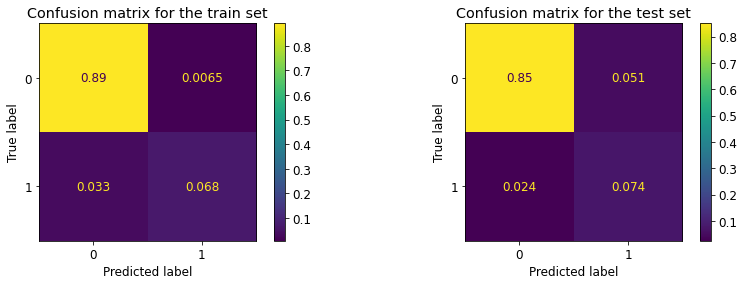

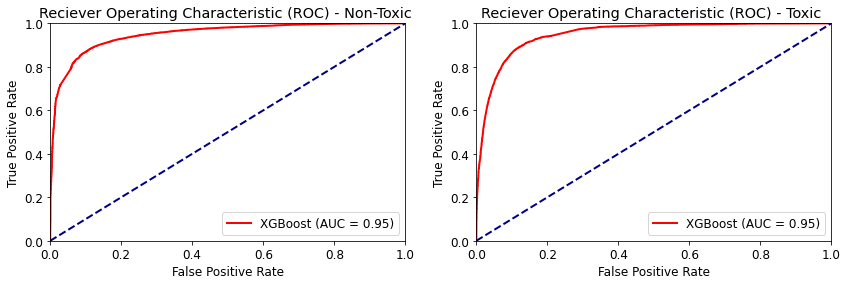

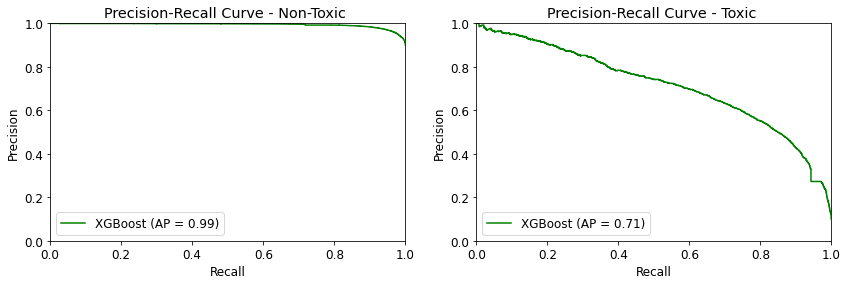

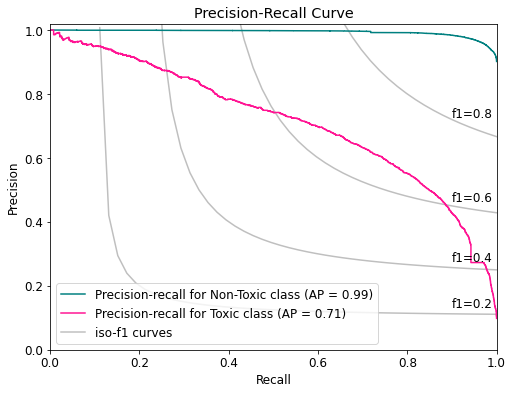

In [52]:
parameters = {
    'clf__n_estimators': (100, 5000),
    'clf__max_depth': (3,6),
    'clf__learning_rate': (0.01,0.5),
#     'clf__sub_sample': (0.5, 1),
    'clf__colsample_bytree': (0.5, 1),
    'clf__subsample': (0.6, 1),
    'clf__eta': (0.01, 0.5),
    'clf__gamma': (0.0,100.0),
    'clf__reg_lambda': (0, 100),
#     'clf__scale_pos_weight': (0.1, 15),
    'clf__max_delta_step': (1, 10)
}

text_vec = ('tfidf', TfidfVectorizer(max_features=4000))
classifier = ('clf', XGBClassifier(objective='binary:logistic', seed=12, use_label_encoder=False))
resample = None

classifier_name = 'XGBoost'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['XG3'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [94]:
summary_dic['XG3'].append('XG3')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['XG3']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[08:10:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:10:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[08:10:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:11:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:22:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:22:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    143292
           1       0.95      0.46      0.61     16225

    accuracy                           0.94    159517
   macro avg       0.94      0.73      0.79    159517
weighted avg       0.94      0.94      0.93    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     57298
           1       0.67      0.52      0.58      6243

    accuracy                           0.93     63541
   macro avg       0.81      0.74      0.77     63541
weighted avg       0.92      0.93      0.92     63541

------------------------------------------------------------------


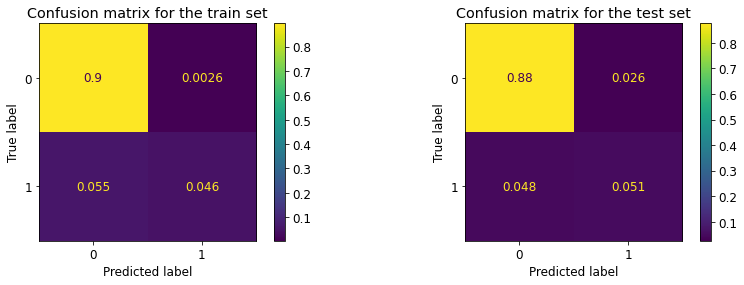

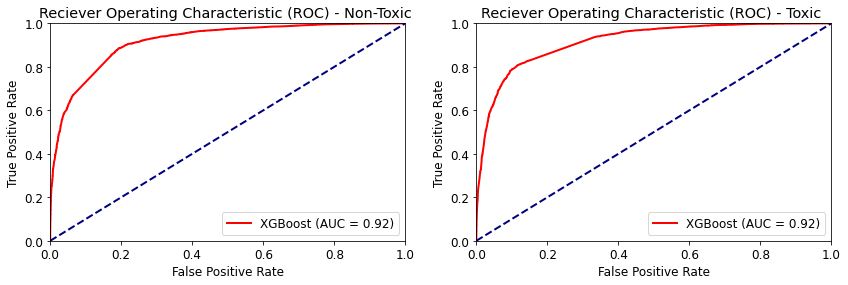

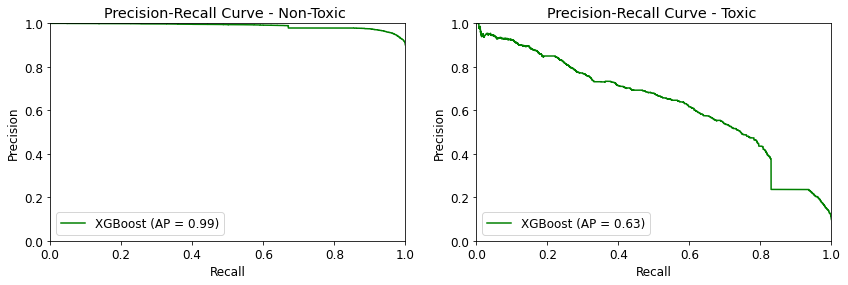

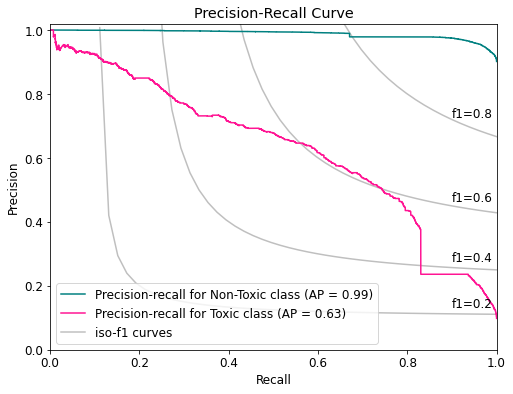

In [53]:
parameters = {
    'clf__n_estimators': (100, 5000),
    'clf__max_depth': (3,6),
    'clf__learning_rate': (0.01,0.5),
#     'clf__sub_sample': (0.5, 1),
    'clf__colsample_bytree': (0.5, 1),
    'clf__subsample': (0.6, 1),
    'clf__eta': (0.01, 0.5),
    'clf__gamma': (0.0,100.0),
    'clf__reg_lambda': (0, 100),
#     'clf__scale_pos_weight': (0.1, 15),
    'clf__max_delta_step': (1, 10)
}

text_vec = ('tfidf', TfidfVectorizer(max_features=4000))
classifier = ('clf', XGBClassifier(objective='binary:logistic', seed=12, use_label_encoder=False))
resample = None

classifier_name = 'XGBoost'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['XG4'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='precision', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [95]:
summary_dic['XG4'].append('XG4')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['XG4']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[08:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:22:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[11:32:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:31:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Exp

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    143292
           1       0.97      0.85      0.91     16225

    accuracy                           0.98    159517
   macro avg       0.98      0.93      0.95    159517
weighted avg       0.98      0.98      0.98    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57298
           1       0.56      0.82      0.67      6243

    accuracy                           0.92     63541
   macro avg       0.77      0.87      0.81     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


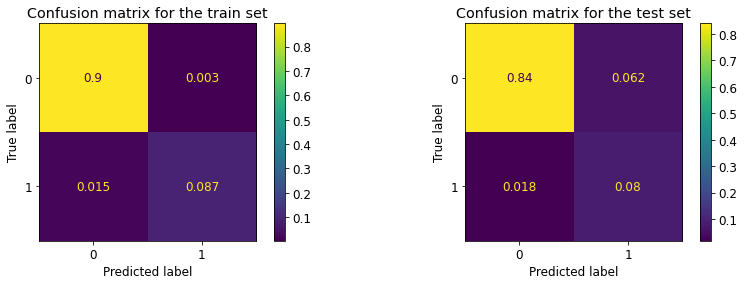

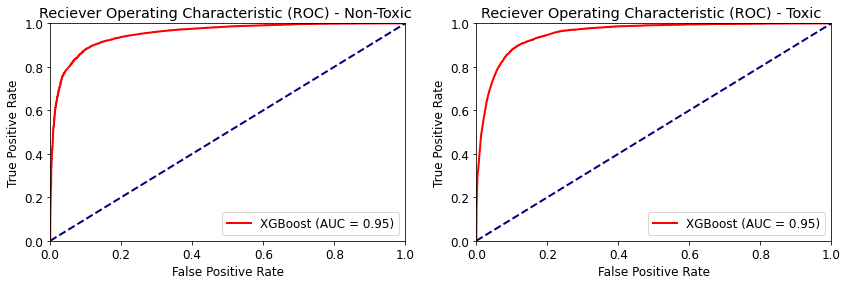

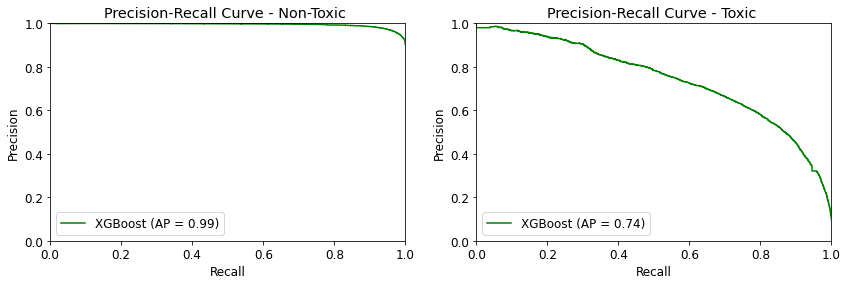

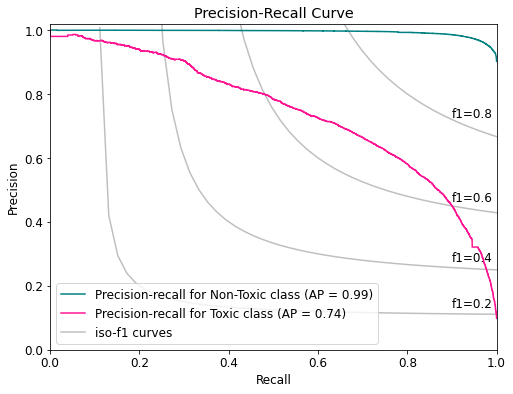

In [54]:
parameters = {
    'clf__n_estimators': (100, 5000),
    'clf__max_depth': (3,6),
    'clf__learning_rate': (0.01,0.5),
#     'clf__sub_sample': (0.5, 1),
    'clf__colsample_bytree': (0.5, 1),
    'clf__subsample': (0.6, 1),
#     'clf__eta': (0.01, 0.5),
#     'clf__gamma': (0.0,100.0),
#     'clf__reg_lambda': (0, 100),
#     'clf__scale_pos_weight': (0.1, 15),
    'clf__max_delta_step': (0, 10)
}

text_vec = ('tfidf', TfidfVectorizer(max_features=4000))
classifier = ('clf', XGBClassifier(objective='binary:logistic', seed=12, use_label_encoder=False))
resample = None

classifier_name = 'XGBoost'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['XG5'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [96]:
summary_dic['XG5'].append('XG5')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['XG5']))
f.close()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use p

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[14:55:32] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:11:22] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:16:28] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    143292
           1       0.90      0.89      0.90     16225

    accuracy                           0.98    159517
   macro avg       0.94      0.94      0.94    159517
weighted avg       0.98      0.98      0.98    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     57298
           1       0.51      0.87      0.64      6243

    accuracy                           0.90     63541
   macro avg       0.75      0.89      0.79     63541
weighted avg       0.94      0.90      0.92     63541

------------------------------------------------------------------


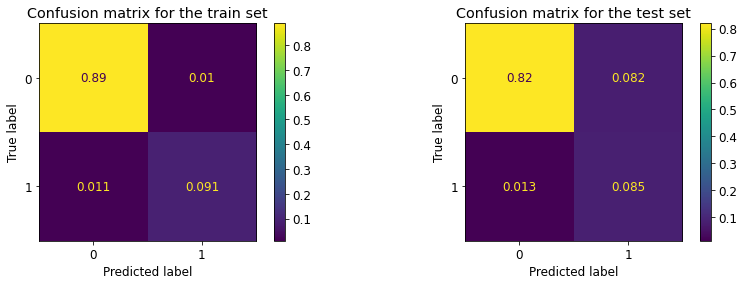

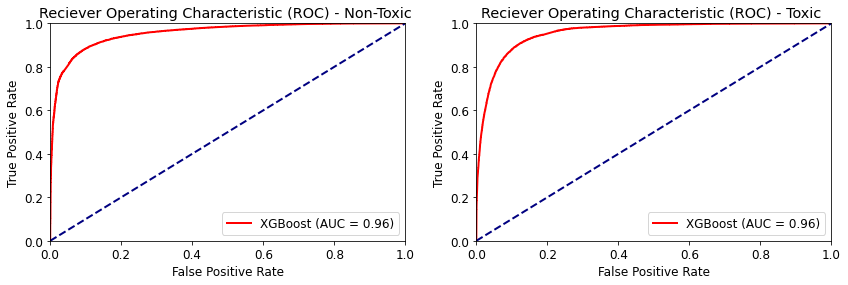

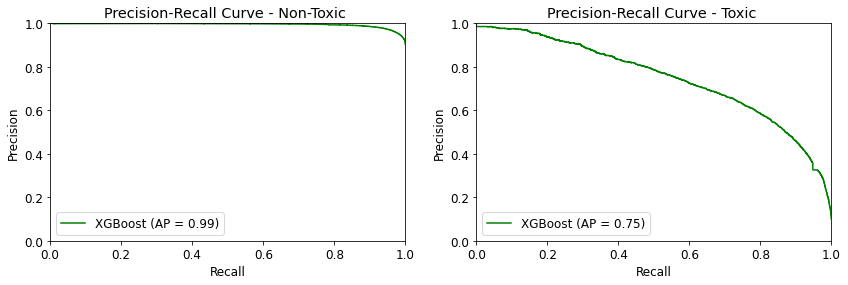

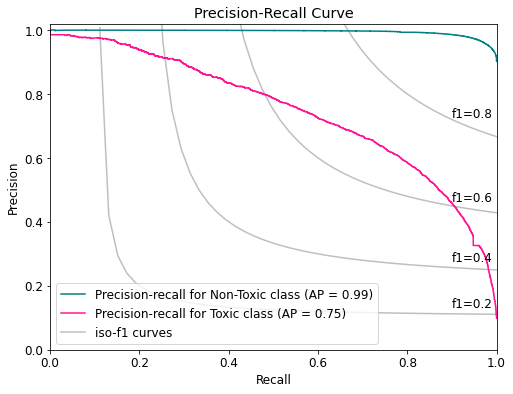

[14:55:33] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:11:23] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:16:29] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

In [42]:
parameters = {
    'tfidf__max_features': (1000, 5000),
#     'under__sampling_strategy': (0.3, 0.7),
#     'under__n_neighbors': (3,10),
    'clf__n_estimators': (100, 3000),
    'clf__max_depth': (3,6),
    'clf__learning_rate': (0.01,1),
#     'clf__sub_sample': (0.5, 1),
#     'clf__eta': (0.01, 0.5),
#     'clf__gamma': (0.0,1.0),
#     'clf__reg_lambda': (0, 100),
    'clf__scale_pos_weight': (0.1, 15),
#     'clf__tree_method': ('exact', 'approx', 'hist', 'gpu_hist')
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', XGBClassifier(objective='binary:logistic', seed=12, use_label_encoder=False,
                            colsample_bytree=0.5))
resample = None

classifier_name = 'XGBoost'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['XG2'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=6,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

## 2.3. LGBM Classifier

## 2.3.1. TF-IDF and LightGBM Classifier

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
372 seconds elapsed.
total iterations will be taken to explore all subspaces:  10
------------------------------------------------------------------

 Parameters of the best model:
	tfidf__max_features: 5107
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    143292
           1       0.93      0.67      0.78     16225

    accuracy                           0.96    159517
   macro avg       0.95      0.83      0.88    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     57298
           1       0.60      0.76      0.67      6243

    accuracy                           0.93     63541
   macro avg       0.79      0.85      0.82     63541
weighted avg       0.94      0.93      0.93     63541

------------------------------------------------------------------


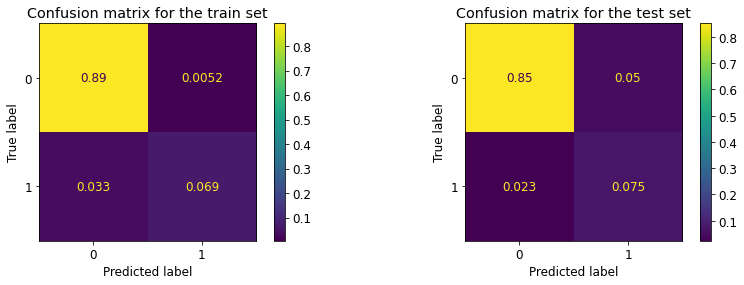

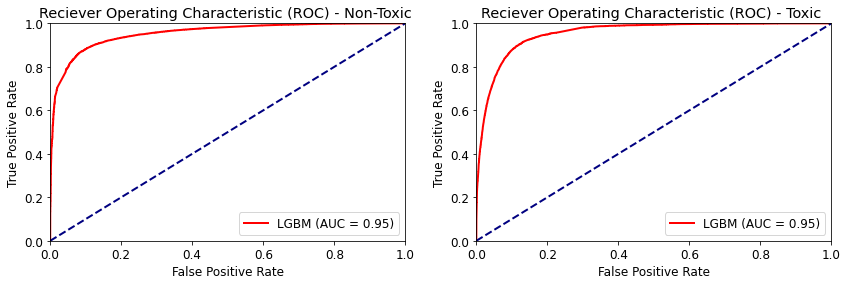

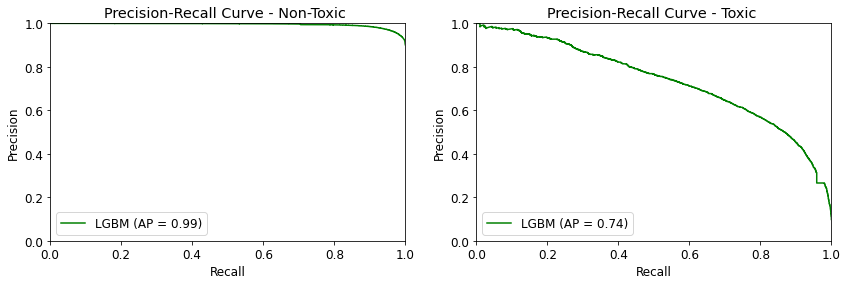

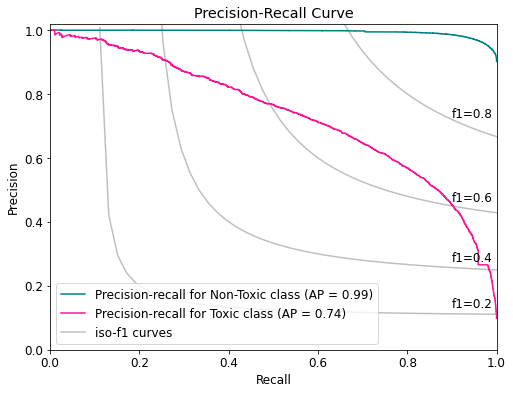

In [56]:
parameters = {
    'tfidf__max_features': (2000, 10000)
#     'clf__n_estimators': (100, 5000),
#     'clf__max_depth': (3,6),
#     'clf__learning_rate': (0.01,0.5),
# #     'clf__sub_sample': (0.5, 1),
#     'clf__colsample_bytree': (0.5, 1),
#     'clf__subsample': (0.6, 1),
# #     'clf__eta': (0.01, 0.5),
# #     'clf__gamma': (0.0,100.0),
# #     'clf__reg_lambda': (0, 100),
# #     'clf__scale_pos_weight': (0.1, 15),
#     'clf__max_delta_step': (0, 10)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG1'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [98]:
summary_dic['LG1'].append('LG1')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG1']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
300 seconds elapsed.
total iterations will be taken to explore all subspaces:  10
------------------------------------------------------------------

 Parameters of the best model:
	tfidf__max_features: 4499
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    143292
           1       0.93      0.67      0.78     16225

    accuracy                           0.96    159517
   macro avg       0.95      0.83      0.88    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     57298
           1       0.60      0.76      0.67      6243

    accuracy                           0.93     63541
   macro avg       0.79      0.85      0.81     63541
weighted avg       0.94      0.93      0.93     63541

------------------------------------------------------------------


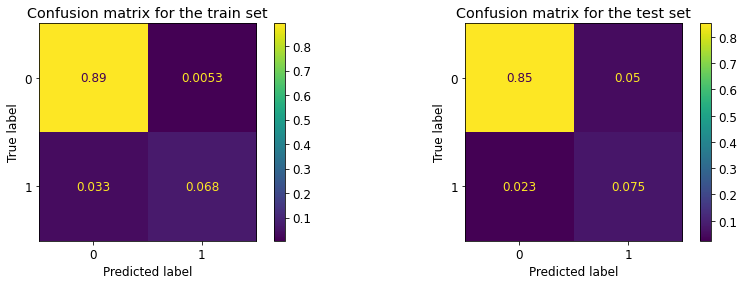

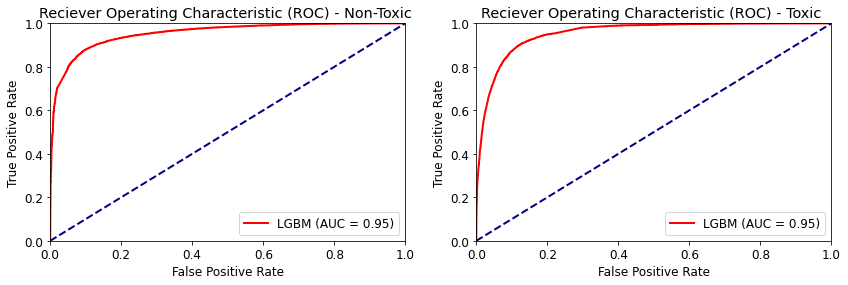

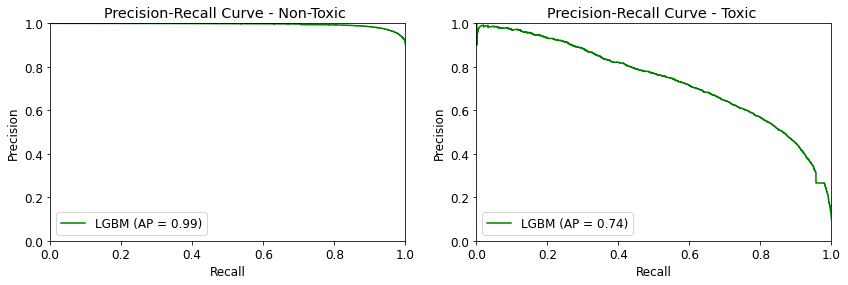

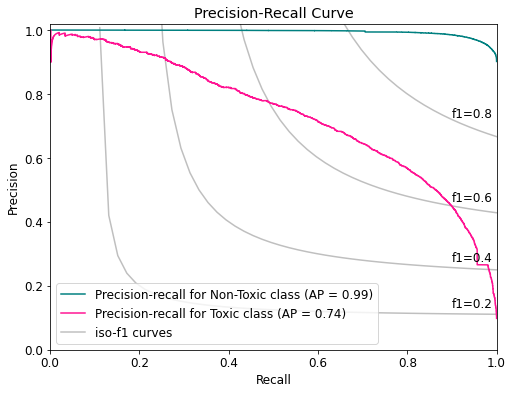

In [58]:
parameters = {
    'tfidf__max_features': (2000, 6000)
#     'clf__n_estimators': (100, 5000),
#     'clf__max_depth': (3,6),
#     'clf__learning_rate': (0.01,0.5),
# #     'clf__sub_sample': (0.5, 1),
#     'clf__colsample_bytree': (0.5, 1),
#     'clf__subsample': (0.6, 1),
# #     'clf__eta': (0.01, 0.5),
# #     'clf__gamma': (0.0,100.0),
# #     'clf__reg_lambda': (0, 100),
# #     'clf__scale_pos_weight': (0.1, 15),
#     'clf__max_delta_step': (0, 10)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', LGBMClassifier(objective="binary"))
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG2'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [99]:
summary_dic['LG2'].append('LG2')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG2']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=5699 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] lambda_l2 is set=0.01774649049175169, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01774649049175169
[LightGBM] [Warning] lambda_l1 is set=0.014944688055322557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014944688055322557
227 seconds

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    143292
           1       0.95      0.73      0.83     16225

    accuracy                           0.97    159517
   macro avg       0.96      0.86      0.90    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     57298
           1       0.58      0.76      0.66      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.85      0.81     63541
weighted avg       0.93      0.92      0.93     63541

------------------------------------------------------------------


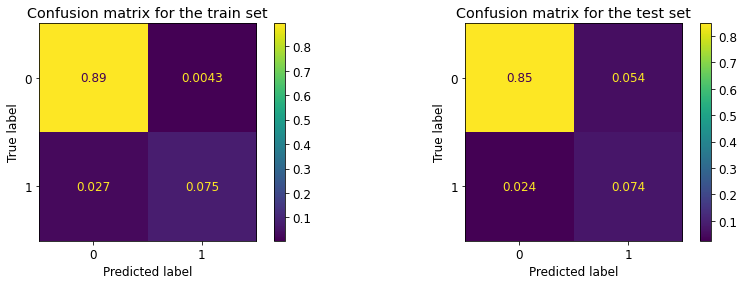

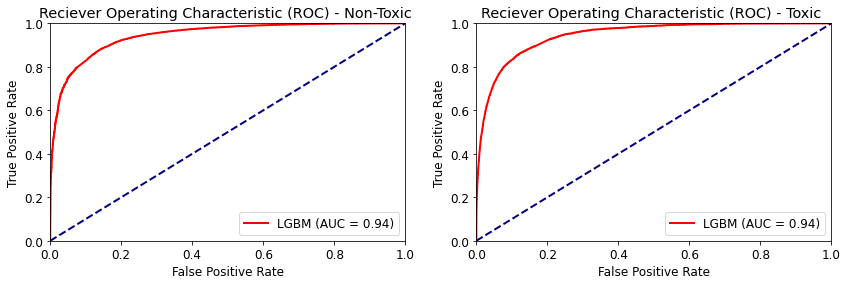

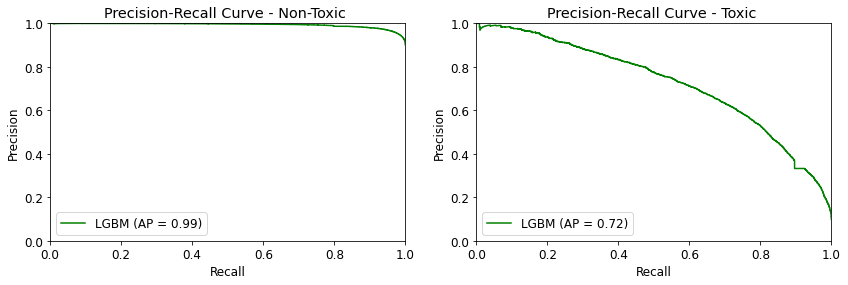

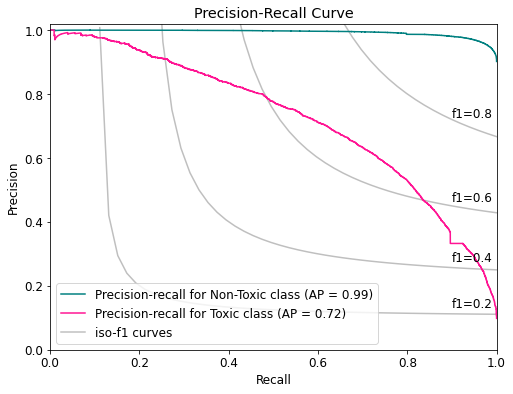

[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=5699 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] lambda_l2 is set=0.01774649049175169, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01774649049175169
[LightGBM] [Warning] lambda_l1 is set=0.014944688055322557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014944688055322557
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=2130 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l2 is set=0.010117912622978623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010117912622978623
[LightGBM] [Warning] lambda_l1 is set=0.023737857457292507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023737857457292507


In [61]:
parameters = {
    'clf__num_leaves': (25, 4000),
    'clf__max_depth': (5, 63),
    'clf__lambda_l2': (0.0, 0.05),
    'clf__lambda_l1': (0.0, 0.05),
    'clf__min_child_samples': (50, 10000),
    'clf__min_data_in_leaf': (100, 2000),
    'clf__learning_rate': (0.01, 0.2)
}

text_vec = ('tfidf', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier(objective="binary"))
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG3'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [100]:
summary_dic['LG3'].append('LG3')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG3']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=2130 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l2 is set=0.010117912622978623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010117912622978623
[LightGBM] [Warning] lambda_l1 is set=0.023737857457292507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023737857457292507
[LightGBM] [Warning] min_data_in_leaf is set=1277, min_child_samples=9742 will be ignored. Current value: min_data_in_leaf=12

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambd

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=357, min_child_samples=8577 will be ignored. Current value: min_data_in_leaf=357
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=10000 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.01341737421015965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01341737421015965
[LightGBM] [Warning] min_data_in_leaf is set=314, min_child_samples=10000 will be ignored. Current value: min_data_in_leaf

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    143292
           1       0.94      0.76      0.84     16225

    accuracy                           0.97    159517
   macro avg       0.96      0.88      0.91    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57298
           1       0.57      0.80      0.67      6243

    accuracy                           0.92     63541
   macro avg       0.77      0.87      0.81     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


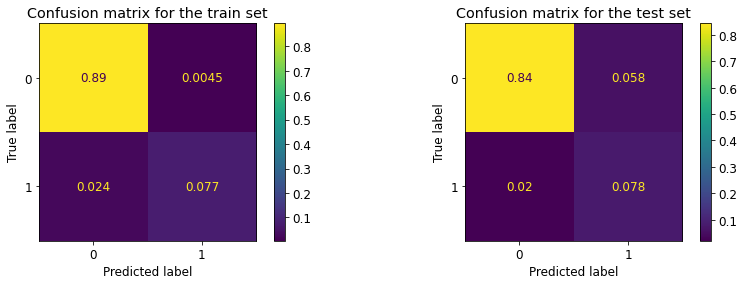

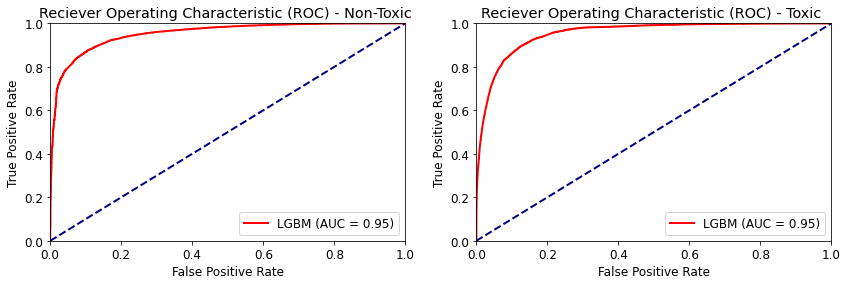

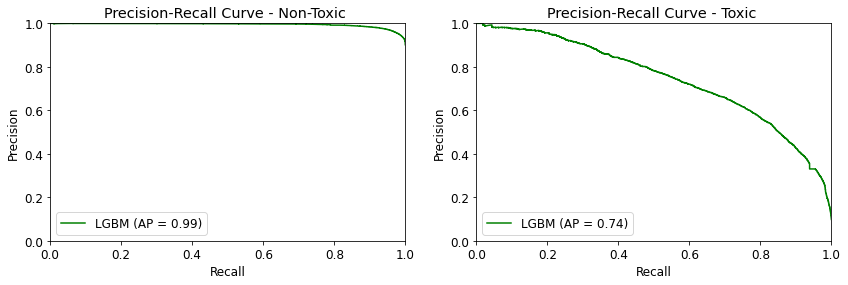

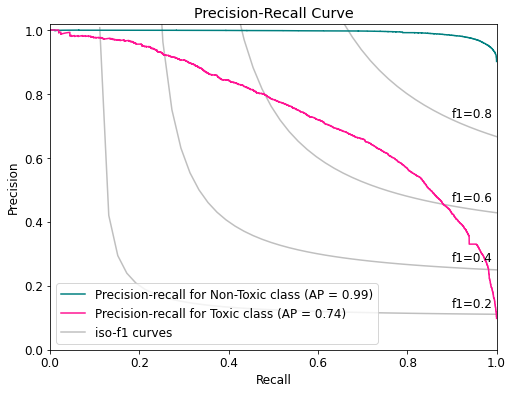

[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=5236 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.041651517835994856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.041651517835994856
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=2728 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0


In [63]:
parameters = {
    'clf__num_leaves': (25, 4000),
    'clf__max_depth': (5, 63),
    'clf__lambda_l2': (0.0, 0.05),
    'clf__lambda_l1': (0.0, 0.05),
    'clf__min_child_samples': (50, 10000),
    'clf__min_data_in_leaf': (100, 2000),
    'clf__learning_rate': (0.01, 0.2),
    'clf__n_estimators':(100, 3000)
}

text_vec = ('tfidf', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier(objective="binary"))
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG4'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=30, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [101]:
summary_dic['LG4'].append('LG4')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG4']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
120 seconds elapsed.
total iterations will be taken to explore all subspaces:  6
------------------------------------------------------------------

 Parameters of the best model:
	count__max_features: 9265
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    143292
           1       0.91      0.66      0.76     16225

    accuracy                           0.96    159517
   macro avg       0.94      0.82      0.87    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     57298
           1       0.59      0.74      0.66      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.84      0.81     63541
weighted avg       0.93      0.92      0.93     63541

------------------------------------------------------------------


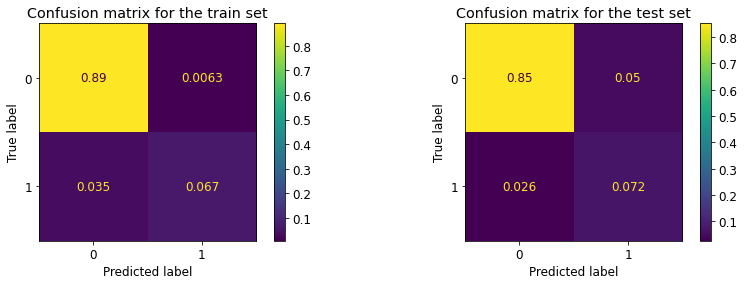

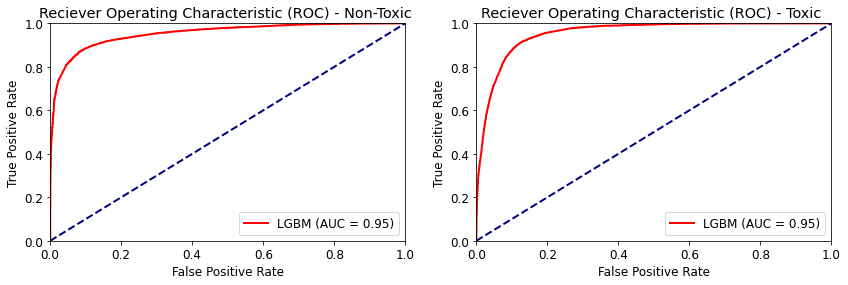

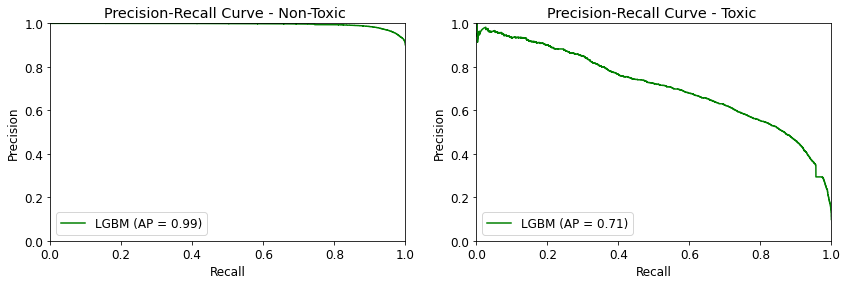

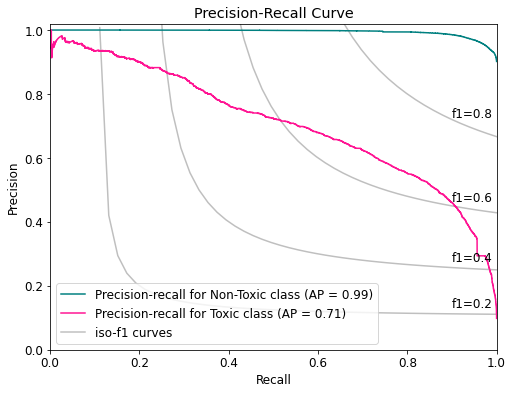

In [69]:
parameters = {
    'count__max_features': (2000, 10000)
#     'clf__n_estimators': (100, 5000),
#     'clf__max_depth': (3,6),
#     'clf__learning_rate': (0.01,0.5),
# #     'clf__sub_sample': (0.5, 1),
#     'clf__colsample_bytree': (0.5, 1),
#     'clf__subsample': (0.6, 1),
# #     'clf__eta': (0.01, 0.5),
# #     'clf__gamma': (0.0,100.0),
# #     'clf__reg_lambda': (0, 100),
# #     'clf__scale_pos_weight': (0.1, 15),
#     'clf__max_delta_step': (0, 10)
}

text_vec = ('count', CountVectorizer(dtype=np.float32))
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'CountVectorizer'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG5'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=6, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [102]:
summary_dic['LG5'].append('LG5')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG5']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
83 seconds elapsed.
total iterations will be taken to explore all subspaces:  2
------------------------------------------------------------------

 Parameters of the best model:
	count__max_features: 4299
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    143292
           1       0.68      0.85      0.76     16225

    accuracy                           0.94    159517
   macro avg       0.83      0.90      0.86    159517
weighted avg       0.95      0.94      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     57298
           1       0.43      0.90      0.58      6243

    accuracy                           0.87     63541
   macro avg       0.71      0.89      0.75     63541
weighted avg       0.93      0.87      0.89     63541

------------------------------------------------------------------


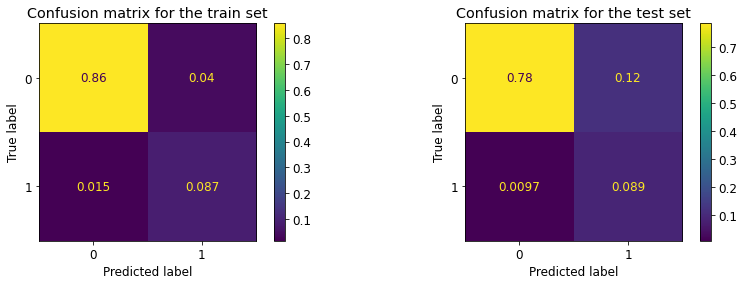

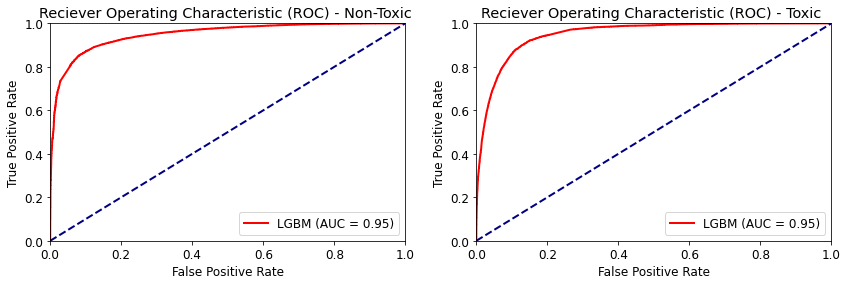

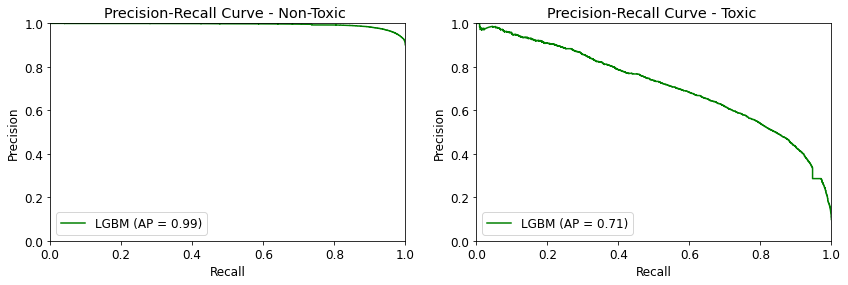

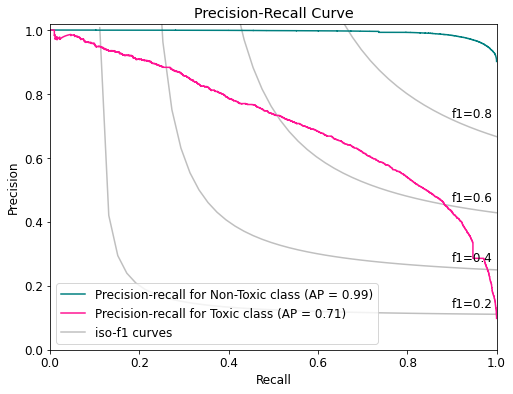

In [76]:
parameters = {
#     'clf__class_weight': (1,10),
    'count__max_features': (4000, 5000)
#     'clf__n_estimators': (100, 5000),
#     'clf__max_depth': (3,6),
#     'clf__learning_rate': (0.01,0.5),
# #     'clf__sub_sample': (0.5, 1),
#     'clf__colsample_bytree': (0.5, 1),
#     'clf__subsample': (0.6, 1),
# #     'clf__eta': (0.01, 0.5),
# #     'clf__gamma': (0.0,100.0),
# #     'clf__reg_lambda': (0, 100),
# #     'clf__scale_pos_weight': (0.1, 15),
#     'clf__max_delta_step': (0, 10),
    }

text_vec = ('count', TfidfVectorizer())
classifier = ('clf', LGBMClassifier(class_weight='balanced'))
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG6'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=2, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [103]:
summary_dic['LG6'].append('LG6')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG6']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2345 seconds elapsed.
total iterations will be taken to explore all subspaces:  40
------------------------------------------------------------------

 Parameters of the best model:
	clf__learning_rate: 0.05290122169990258
	clf__max_depth: 5
	clf__n_estimators: 3166
	clf__num_leaves: 874
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    143292
           1       0.97      0.79      0.87     16225

    accuracy                           0.98    159517
   macro avg       0.97      0.89      0.93    159517
weighted avg       0.98      0.98      0.98    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57298
           1       0.59      0.80      0.68      6243

    accuracy                           0.93     63541
   macro avg       0.78      0.87      0.82     63541
weighted avg       0.94      0.93      0.93     63541

------------------------------------------------------------------


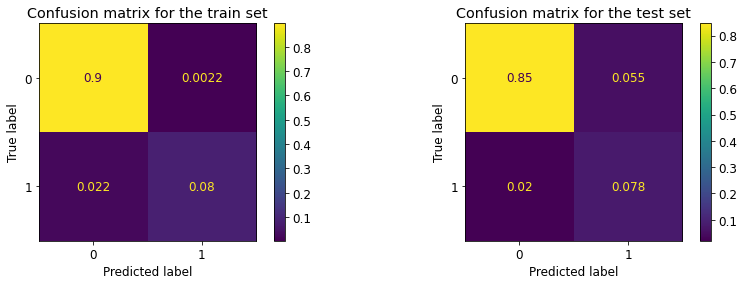

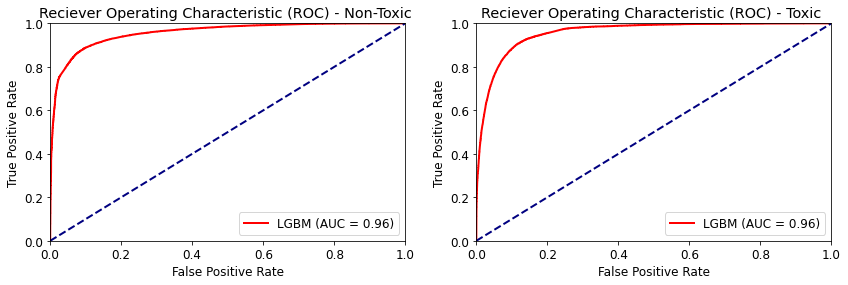

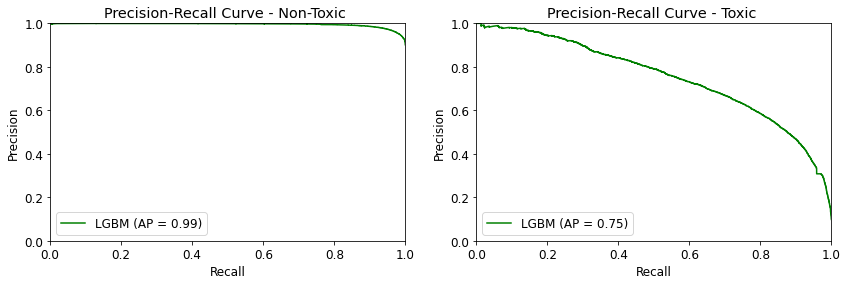

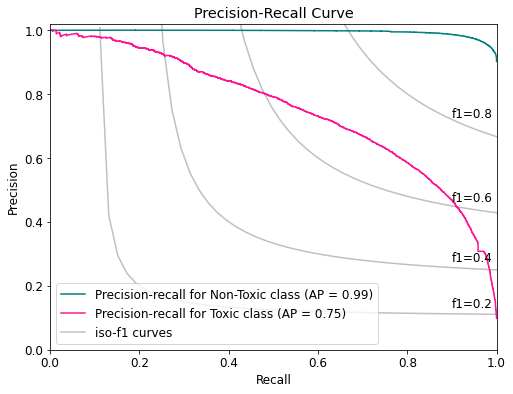

In [78]:
parameters = {
    'clf__num_leaves': (8, 4000),
    'clf__max_depth': (2, 12),
#     'clf__min_data_in_leaf': (100, 2000),
#     'clf__lambda_l2': (0.0, 0.05),
#     'clf__lambda_l1': (0.0, 0.05),
#     'clf__min_child_samples': (50, 10000),
    'clf__learning_rate': (0.01, 0.3),
    'clf__n_estimators':(100, 5000)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG7'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [104]:
summary_dic['LG7'].append('LG7')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG7']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2486 seconds elapsed.
total iterations will be taken to explore all subspaces:  60
--------------------------------

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    143292
           1       0.97      0.78      0.87     16225

    accuracy                           0.98    159517
   macro avg       0.97      0.89      0.93    159517
weighted avg       0.98      0.98      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57298
           1       0.58      0.80      0.67      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.87      0.82     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


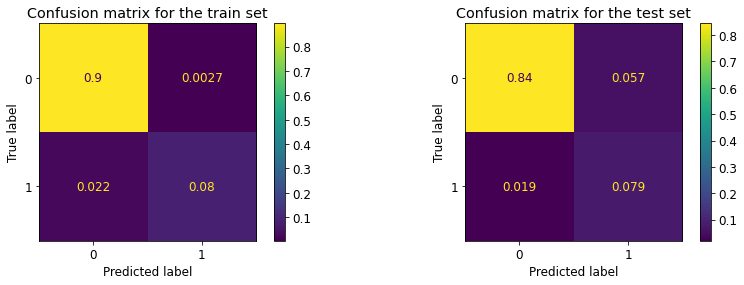

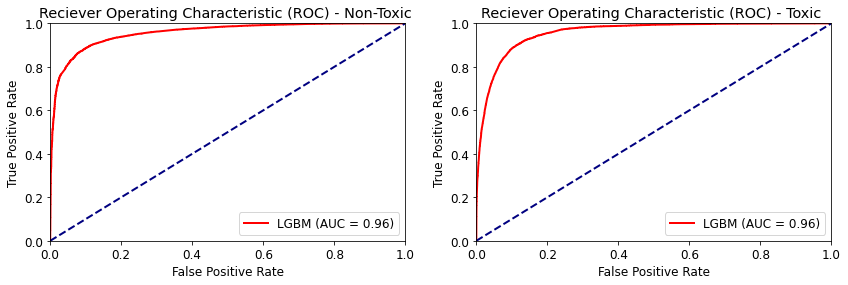

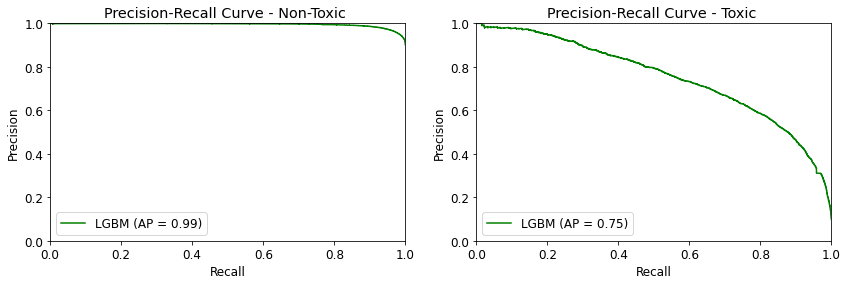

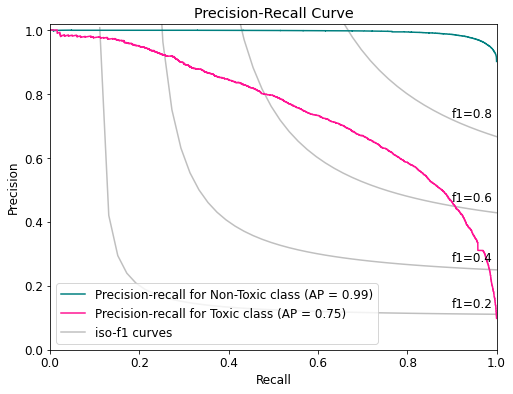

In [80]:
parameters = {
    'clf__num_leaves': (500, 8000),
    'clf__max_depth': (2, 6),
#     'clf__min_data_in_leaf': (100, 2000),
#     'clf__lambda_l2': (0.0, 0.05),
#     'clf__lambda_l1': (0.0, 0.05),
#     'clf__min_child_samples': (50, 10000),
    'clf__learning_rate': (0.01, 0.1),
    'clf__n_estimators':(1000, 5000)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG8'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=15, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [105]:
summary_dic['LG8'].append('LG8')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG8']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2802 seconds elapsed.
total iterations will be taken to explore all subspaces:  60
--------------------------------

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    143292
           1       0.98      0.83      0.90     16225

    accuracy                           0.98    159517
   macro avg       0.98      0.91      0.94    159517
weighted avg       0.98      0.98      0.98    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57298
           1       0.58      0.81      0.67      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.87      0.81     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


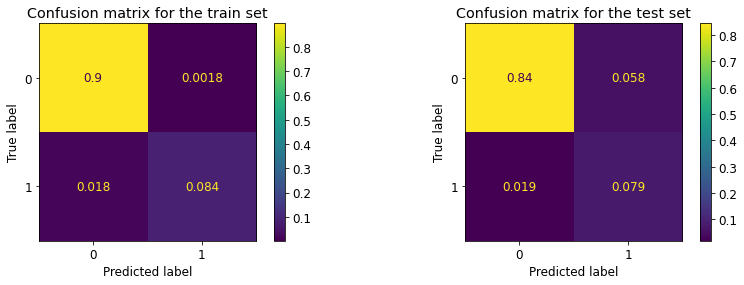

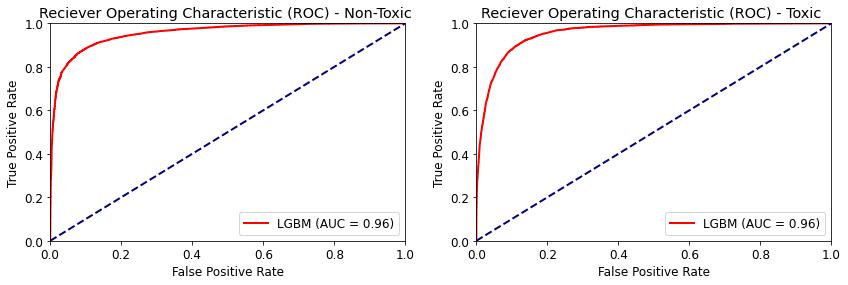

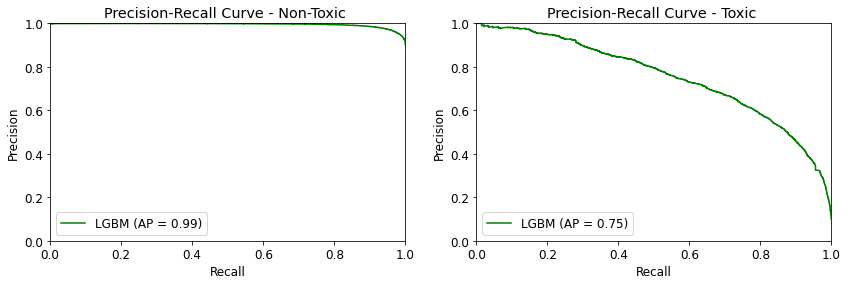

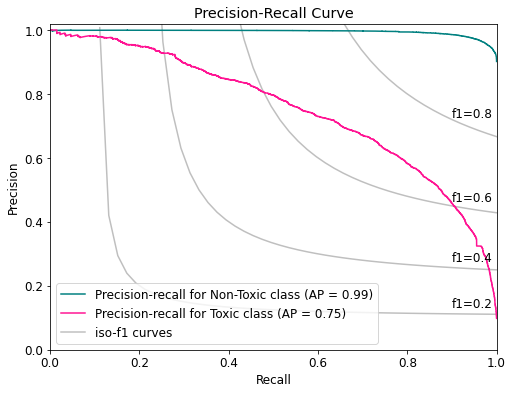

In [81]:
parameters = {
    'clf__num_leaves': (4000, 10000),
    'clf__max_depth': (2, 4),
#     'clf__min_data_in_leaf': (100, 2000),
#     'clf__lambda_l2': (0.0, 0.05),
#     'clf__lambda_l1': (0.0, 0.05),
#     'clf__min_child_samples': (50, 10000),
    'clf__learning_rate': (0.01, 0.1),
    'clf__n_estimators':(4000, 6000)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG9'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=15, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [106]:
summary_dic['LG9'].append('LG9')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG9']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    143292
           1       0.97      0.78      0.86     16225

    accuracy                           0.97    159517
   macro avg       0.97      0.89      0.92    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57298
           1       0.58      0.80      0.68      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.87      0.82     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


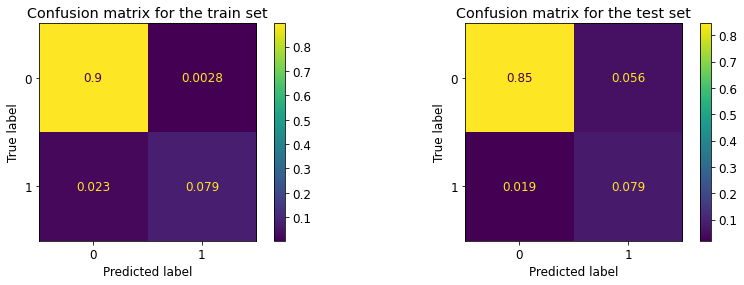

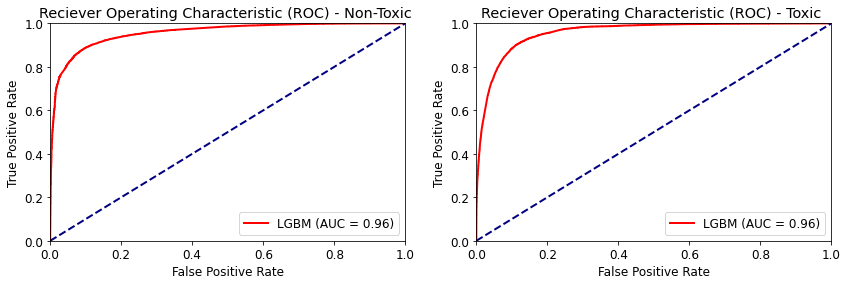

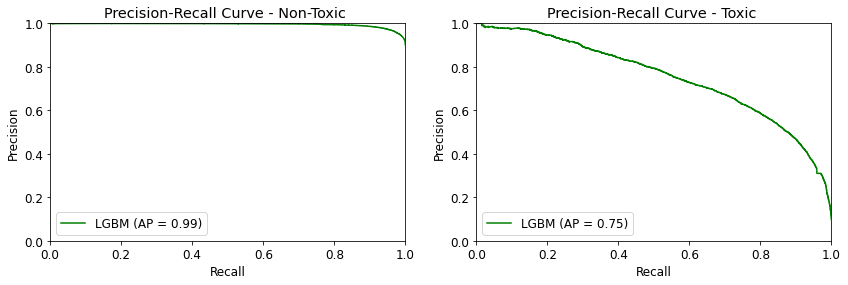

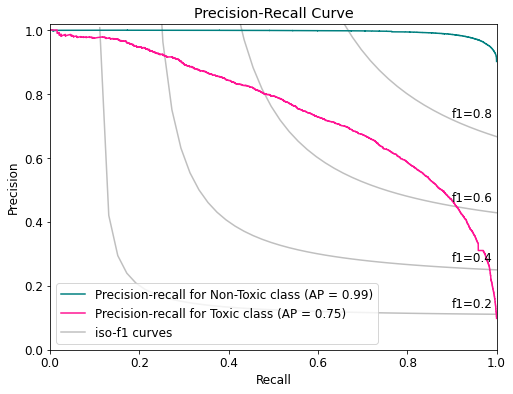

In [83]:
parameters = {
    'clf__num_leaves': (6000, 10000),
    'clf__max_depth': (2, 3),
#     'clf__min_data_in_leaf': (100, 2000),
#     'clf__lambda_l2': (0.0, 0.05),
#     'clf__lambda_l1': (0.0, 0.05),
#     'clf__min_child_samples': (50, 10000),
    'clf__learning_rate': (0.01, 0.05),
    'clf__n_estimators':(5000, 8000)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG10'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=20, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [107]:
summary_dic['LG10'].append('LG10')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG10']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] bagging_fraction is set=0.5560678618593875, subsample=1.0 will be ignored. Current val

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] bagging_fraction is set=0.5560678618593875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5560678618593875
[LightGBM] [Warning] lambda_l2 is set=24.138307674015852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=24.138307674015852
[LightGBM] [Warning] min_gain_to_split is set=8, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8
[LightGBM] [Warning] lambda_l1 is set=20.235825245957244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20.23

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] bagging_fraction is set=0.42417032082983835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42417032082983835
[LightGBM] [Warning] lambda_l2 is set=76.75294034083478, reg_lambda=0.0 will be ignored. Current value: lambda_l2=76.75294034083478
[LightGBM] [Warning] min_gain_to_split is set=2, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2
[LightGBM] [Warning] lambda_l1 is set=35.49298098350338, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35.49298098350338
[LightGBM] [Warning] min_data_in_leaf is set=1792, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1792
[LightGBM] [Warning] bagging_fraction is set=0.6685099304588458, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6685099304588458
[LightGBM] [

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=15.979573441807393, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15.979573441807393
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: baggi

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_data_in_leaf is set=247, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=247
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. 

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    143292
           1       0.95      0.73      0.82     16225

    accuracy                           0.97    159517
   macro avg       0.96      0.86      0.90    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57298
           1       0.59      0.78      0.67      6243

    accuracy                           0.93     63541
   macro avg       0.78      0.86      0.82     63541
weighted avg       0.94      0.93      0.93     63541

------------------------------------------------------------------


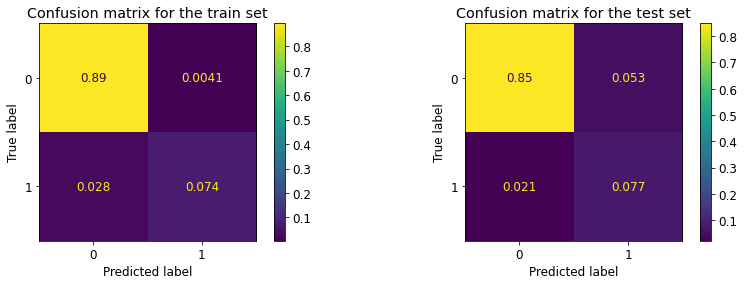

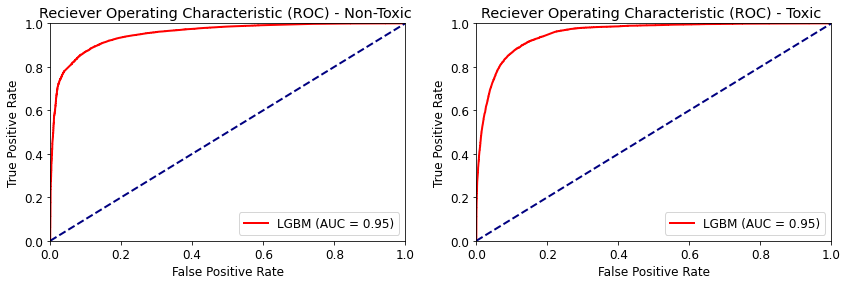

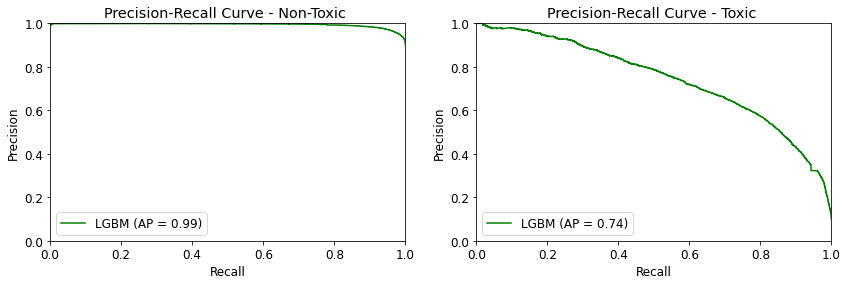

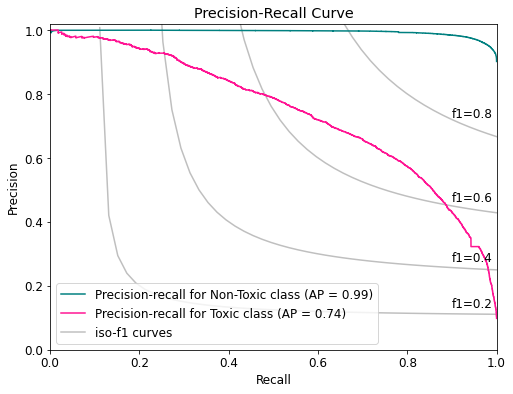

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=100.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100.0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignor

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0


In [85]:
parameters = {
    'clf__num_leaves': (1000, 8000),
    'clf__max_depth': (2, 3),
    'clf__min_data_in_leaf': (100, 2000),
    'clf__lambda_l2': (0.0, 100),
    'clf__lambda_l1': (0.0, 100),
    'clf__min_gain_to_split': (0, 15),
    'clf__learning_rate': (0.01, 0.05),
    'clf__n_estimators':(1000, 6000),
    'clf__bagging_fraction': (0.2, 0.95)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG11'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=30, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [108]:
summary_dic['LG11'].append('LG11')

f = open('Ensemble_Summary_Results', 'a')
f.write(repr(summary_dic['LG11']))
f.close()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=512, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=512
[LightGBM] [Warning] bagging_fraction is set=0.3109514354307825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3109514354307825
[LightGBM] [Warning] min_gain_to_split is set=15, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=15
[LightGBM] [Warning] min_data_in_leaf is set=1209, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1209
[LightGBM] [Warning] bagging_fraction is set=0.42417032082983835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42417032082983835
[LightGBM] [Warning] min_gain_to_split is set=9, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9
[LightGBM] [Warning] min_data_in_le

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    143292
           1       0.94      0.48      0.63     16225

    accuracy                           0.94    159517
   macro avg       0.94      0.74      0.80    159517
weighted avg       0.94      0.94      0.94    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     57298
           1       0.65      0.56      0.60      6243

    accuracy                           0.93     63541
   macro avg       0.80      0.76      0.78     63541
weighted avg       0.92      0.93      0.92     63541

------------------------------------------------------------------


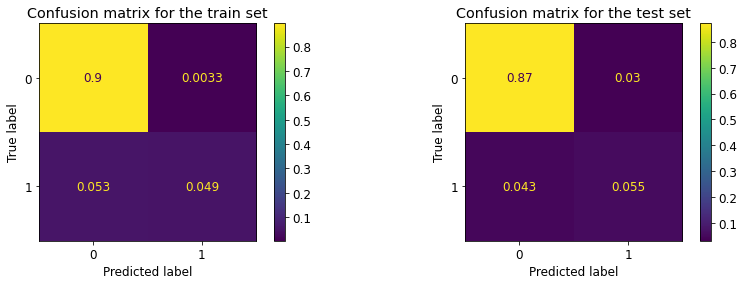

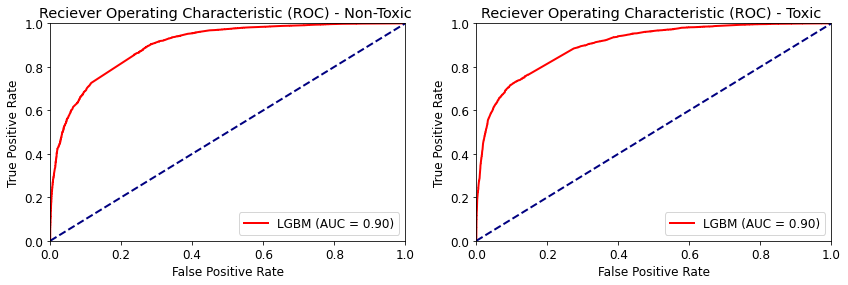

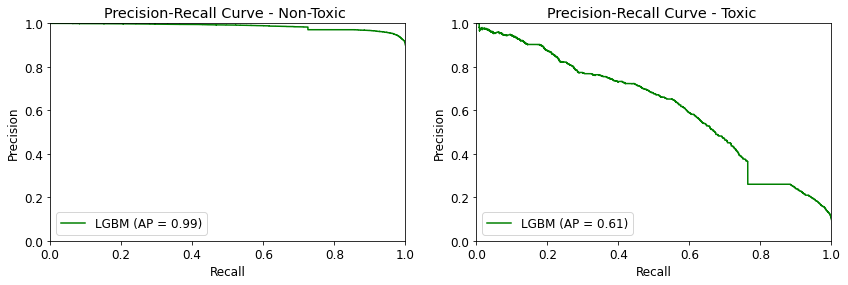

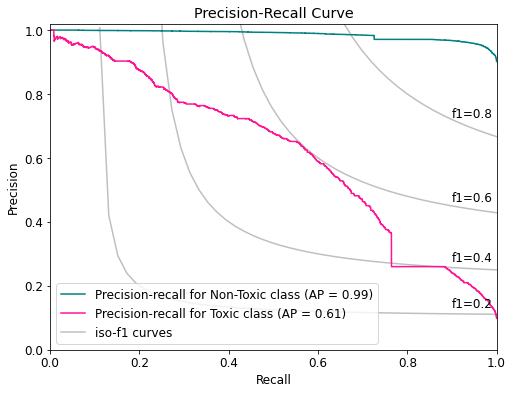

In [112]:
parameters = {
    'clf__num_leaves': (100, 8000),
    'clf__max_depth': (3, 12),
    'clf__min_data_in_leaf': (100, 2000),
    'clf__reg_lambda': (0.0, 100),
    'clf__reg_alpha': (0.0, 100),
    'clf__min_gain_to_split': (0, 15),
    'clf__learning_rate': (0.01, 0.05),
    'clf__n_estimators':(1000, 8000),
    'clf__bagging_fraction': (0.2, 0.95)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier(boosting_type='dart', objective='binary'))
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG12'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='roc_auc', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=3, classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] min_data_in_leaf is set=1209, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1209
[LightGBM] [Warning] bagging_fraction is set=0.42417032082983835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42417032082983835
[LightGBM] [Warning] min_gain_to_split is set=9, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9
[LightGBM] [Warning] min_data_in_leaf is set=1209, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1209
[LightGBM] [Warning] bagging_fraction is set=0.42417032082983835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42417032082983835
[LightGBM] [Warning] min_gain_to_split is set=9, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9
[LightGBM] [Warning] min_data_in_leaf is set=359, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=359
[LightGBM] [Warning] baggin

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warning] bagging_fraction is set=0.35616493331086246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35616493331086246
[LightGBM] [Warning] min_gain_to_split is set=10, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10
[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warning] bagging_fraction is set=0.35616493331086246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35616493331086246
[LightGBM] [Warning] min_gain_to_split is set=10, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10
[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warning] baggin

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    143292
           1       0.93      0.50      0.65     16225

    accuracy                           0.95    159517
   macro avg       0.94      0.75      0.81    159517
weighted avg       0.94      0.95      0.94    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     57298
           1       0.63      0.58      0.60      6243

    accuracy                           0.93     63541
   macro avg       0.79      0.77      0.78     63541
weighted avg       0.92      0.93      0.92     63541

------------------------------------------------------------------


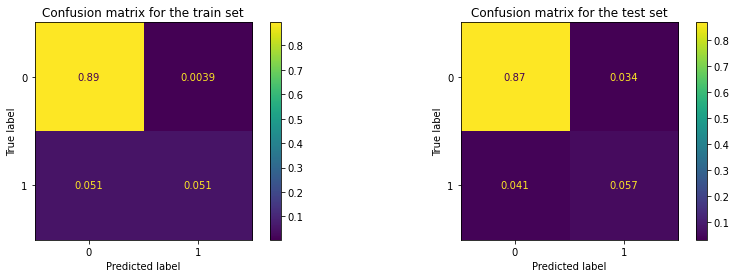

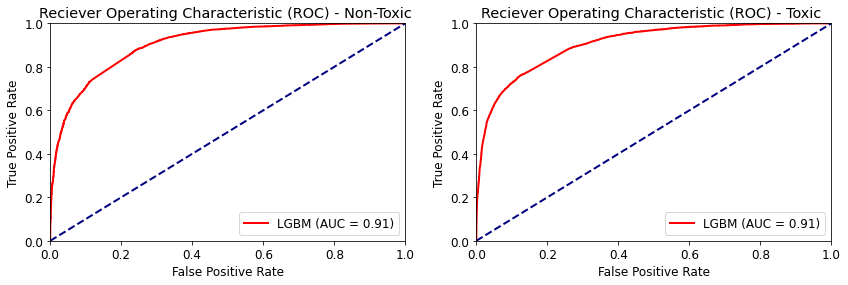

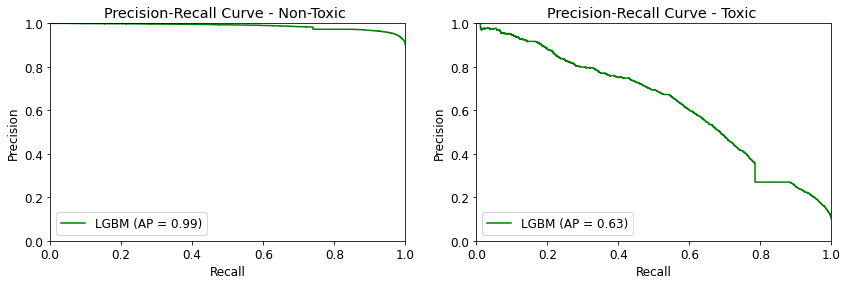

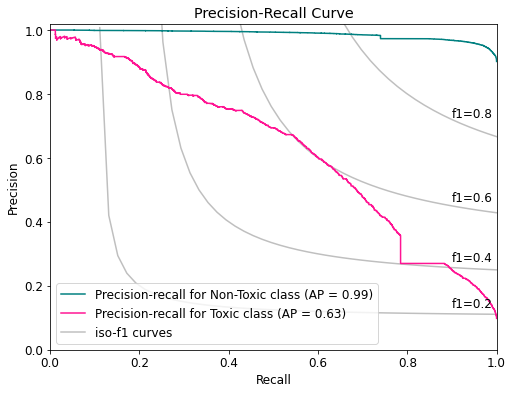

In [10]:
parameters = {
    'clf__num_leaves': (100, 8000),
    'clf__max_depth': (3, 12),
    'clf__min_data_in_leaf': (100, 2000),
    'clf__reg_lambda': (0.0, 100),
    'clf__reg_alpha': (0.0, 100),
    'clf__min_gain_to_split': (0, 15),
    'clf__learning_rate': (0.01, 0.05),
    'clf__n_estimators':(1000, 8000),
    'clf__bagging_fraction': (0.2, 0.95)
}

text_vec = ('count', TfidfVectorizer(max_features=5000))
classifier = ('clf', LGBMClassifier(boosting_type='dart', objective='binary'))
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG14'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=10, bayes_n_points=3, \
                          classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [11]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.utils import tokenize, simple_preprocess
from sklearn.base import BaseEstimator

In [12]:
class Doc2VecModel(BaseEstimator):

    def __init__(self, dm=1, vector_size=100, window=1, epochs=10, max_vocab_size=12e7, min_count=1):
        #print('>>>>>>>>init() called.\n')
        self.d2v_model = None
        self.vector_size = vector_size
        self.window = window
        self.dm = dm
        self.epochs = epochs
        self.max_vocab_size = max_vocab_size
        self.min_count = min_count

    def fit(self, corpus, y=None):
        #print('>>>>>>>>fit() called.\n')
        ## Initialize model
        self.d2v_model = Doc2Vec(vector_size=self.vector_size, window=self.window, dm=self.dm, epochs=self.epochs,
                                 max_vocab_size=self.max_vocab_size, min_count=self.min_count,
                                 alpha=0.025, min_alpha=0.001, seed=21)
        ## Tag docs
        docs_tagged=[]
        for index, row in corpus.iteritems():
            docs_tagged.append(TaggedDocument(words=list(tokenize(row)), tags=str(index)))
        ## Build vocabulary
        self.d2v_model.build_vocab(docs_tagged)
        ## Train model
        self.d2v_model.train(pd.Series(docs_tagged).values, total_examples=self.d2v_model.corpus_count, epochs=self.d2v_model.epochs)
        return self

    def transform(self, corpus):
        #print('>>>>>>>>transform() called.\n')
        sents = corpus.values
        regressors = [(self.d2v_model.infer_vector(doc[0].split(), steps=20)) for doc in sents]
        regressors = pd.DataFrame(regressors, index=corpus.index)
        return regressors


    def fit_transform(self, corpus, y=None):
        self.fit(corpus)
        return self.transform(corpus)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
1410 seconds elapsed.
total iterations will be taken to explore all subspaces:  15
------------------------------------------------------------------

 Parameters of the best model:
	vect__epochs: 10
	vect__vector_size: 186
	vect__window: 3
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    143292
           1       0.17      0.00      0.00     16225

    accuracy                           0.90    159517
   macro avg       0.53      0.50      0.47    159517
weighted avg       0.82      0.90      0.85    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     57298
           1       0.00      0.00      0.00      6243

    accuracy                           0.90     63541
   macro avg       0.45      0.50      0.47     63541
weighted avg       0.81      0.90      0.86     63541

------------------------------------------------------------------


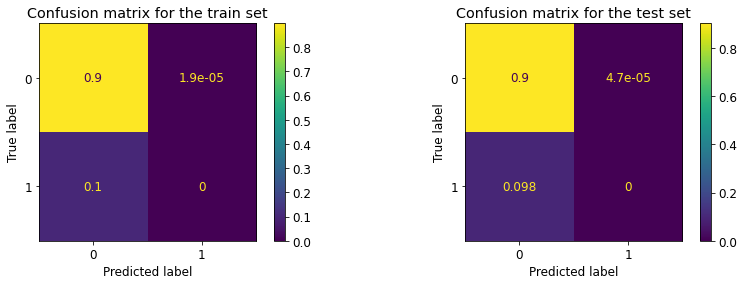

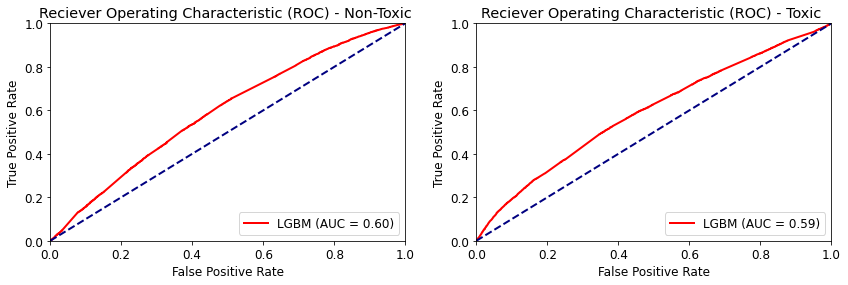

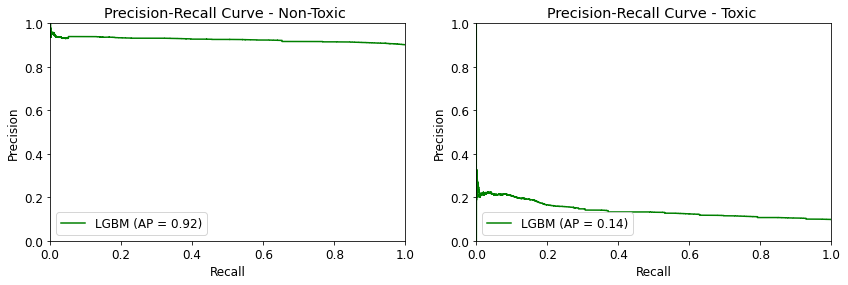

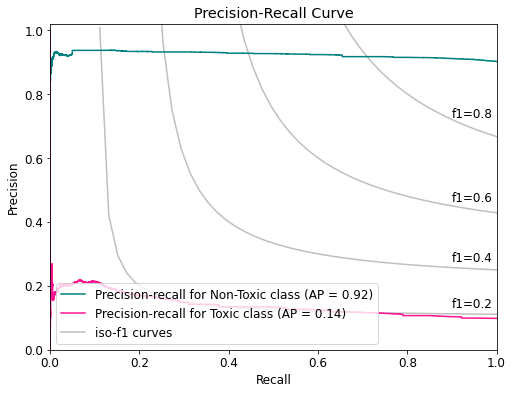

In [14]:
parameters = {'vect__window': list(range(5)),
#               'vect__dm': [0,1],
              'vect__vector_size': list(range(100,400)),
#               'vect__min_count': list(range(100)),
              'vect__epochs': [10,15,20],
#     'clf__num_leaves': (100, 8000),
#     'clf__max_depth': (3, 12),
#     'clf__min_data_in_leaf': (100, 2000),
#     'clf__reg_lambda': (0.0, 100),
#     'clf__reg_alpha': (0.0, 100),
#     'clf__min_gain_to_split': (0, 15),
#     'clf__learning_rate': (0.01, 0.05),
#     'clf__n_estimators':(1000, 8000),
#     'clf__bagging_fraction': (0.2, 0.95)
}

text_vec = ('vect', Doc2VecModel())
classifier = ('clf', LGBMClassifier())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG14'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=5, bayes_n_points=1, \
                          classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

2728 seconds elapsed.
total iterations will be taken to explore all subspaces:  30
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 37
	vect__dm: 0
	vect__epochs: 20
	vect__min_count: 3
	vect__vector_size: 270
	vect__window: 0
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    143292
           1       0.00      0.00      0.00     16225

    accuracy                           0.90    159517
   macro avg       0.45      0.50      0.47    159517
weighted avg       0.81      0.90      0.85    159517

Classification report for the test set:


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zori/opt/anacon

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     57298
           1       0.00      0.00      0.00      6243

    accuracy                           0.90     63541
   macro avg       0.45      0.50      0.47     63541
weighted avg       0.81      0.90      0.86     63541

------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


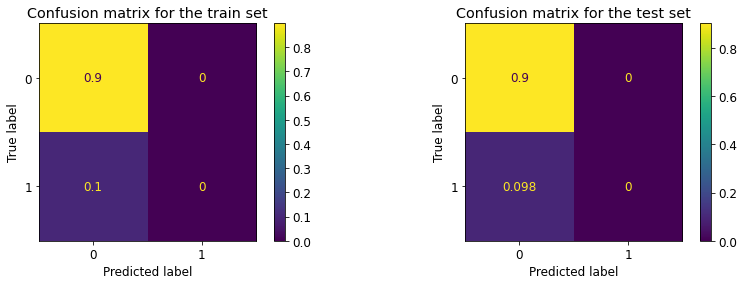

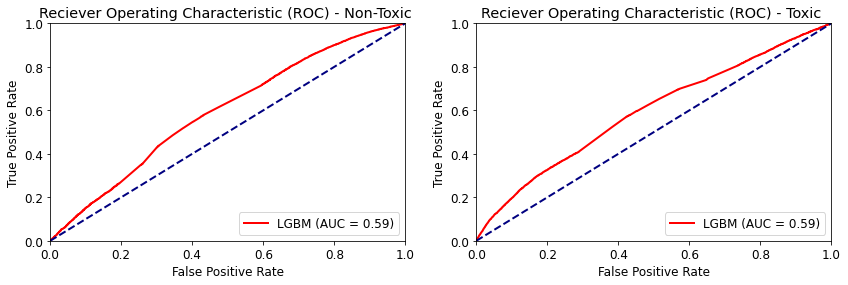

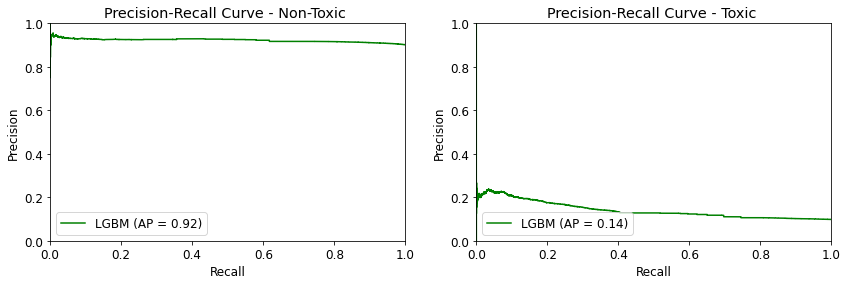

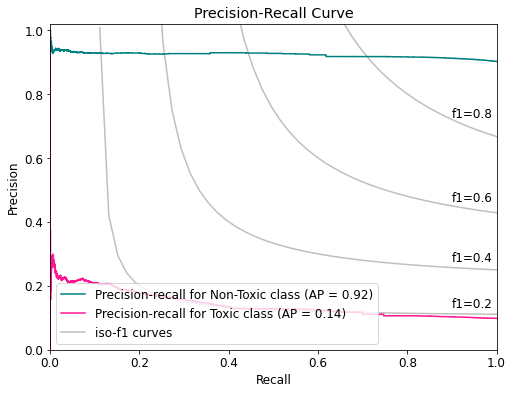

In [15]:
parameters = {'vect__window': list(range(5)),
              'vect__dm': [0,1],
              'vect__vector_size': list(range(100,400)),
              'vect__min_count': (2,3),
              'vect__epochs': [10,15,20],
    'clf__C': (10, 100),
#     'clf__max_depth': (3, 12),
#     'clf__min_data_in_leaf': (100, 2000),
#     'clf__reg_lambda': (0.0, 100),
#     'clf__reg_alpha': (0.0, 100),
#     'clf__min_gain_to_split': (0, 15),
#     'clf__learning_rate': (0.01, 0.05),
#     'clf__n_estimators':(1000, 8000),
#     'clf__bagging_fraction': (0.2, 0.95)
}

text_vec = ('vect', Doc2VecModel())
classifier = ('clf', LogisticRegression())
resample = None

classifier_name = 'LGBM'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LG15'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=3, bayes_n_iter=5, bayes_n_points=1, \
                          classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))